# Hola Andrés! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo Andrés. Tu notebook tiene varias ideas correctas, pero hay varias modificaciones y correcciones que debes hacer antes de tener el notebook completo y sin errores. Te dejé indicaciones de cómo corregirlos, revísalas y realiza las modificaciones necesarias.
    
Saludos!    

</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho Andrés, has completado correctamente todo lo necesario del notebook. No tengo comentarios de corrección adicionales, está aprobado.

Saludos!

</div>

----

# Proyecto: Sprint 12

Este proyecto tiene como objetivo modelar el proceso de recuperación del oro a partir del mineral, basándose en datos reales de las etapas de **flotación** y **purificación**.

**Pasos del proyecto:**
1. Preparar los datos.
2. Analizar los datos.
3. Construir y evaluar modelos de predicción.


## Cargar los datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datasets
train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)

train.shape, test.shape, full.shape

((16860, 86), (5856, 52), (22716, 86))

## Verificar cálculo de la recuperación

In [8]:
# Fórmula corregida del revisor: C * (F - T) / (F * (C - T)) * 100
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

recovery_calc = C * (F - T) / (F * (C - T)) * 100
recovery_real = train['rougher.output.recovery']

# Comparar con EAM
valid = recovery_calc.notna() & recovery_real.notna()
mae = np.mean(np.abs(recovery_calc[valid] - recovery_real[valid]))
print(f"EAM entre recuperación calculada y real: {mae:.2f}")

EAM entre recuperación calculada y real: 0.00


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

La fórmula utilizada es incorrecta, debes usar lo siguiente:
    
    C*(F - T) /(F (C - T)) * 100

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien, corregido

</div>

## Características no disponibles en el conjunto de prueba

In [3]:
# Comparar columnas
train_cols = set(train.columns)
test_cols = set(test.columns)
missing_in_test = sorted(train_cols - test_cols)
print(f"Columnas presentes en train pero no en test: ({len(missing_in_test)} columnas)")
missing_in_test[:5]

Columnas presentes en train pero no en test: (34 columnas)


['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery']

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, bien uso de set

</div>

## Preprocesamiento de los datos

In [11]:
# Variables objetivo
target_cols = ['rougher.output.recovery', 'final.output.recovery']

# Separar variables objetivo
y = train[target_cols]

# Eliminar columnas que no están en test
cols_to_drop = list(set(train.columns) - set(test.columns) - set(target_cols))
X = train.drop(columns=cols_to_drop + target_cols)

# Combinar para limpieza
data = X.join(y)
data = data.dropna(subset=target_cols)

# Separar X e y limpias
X_clean = data.drop(columns=target_cols)
y_clean = data[target_cols]

# Imputar faltantes usando interpolación
X_imputed = X_clean.interpolate(method='time').fillna(method='bfill')
X_imputed.isna().sum().sum()

0

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Normalmente, imputar valores nulos por la media de toda la data no es buena idea, se introduce un sesgo muy marcado, sobre todo cuando hay mucha variabilidad en la columna. Una mejor idea es segmentar la data, para encontrar subconjuntos de esta, donde la variabilidad es menor y la imputación por la media o mediana hace más sentido. 
    
En este caso, la data está indexada por datetime, por lo tanto, se puede aprovechar esto para imputar los nulos usando los valores que vienen antes y después. Dado que las variables que se deben imputar son concentraciones, es probable que sean muy similares a los valores que los rodean, ya que no deberían variar demasiado. Teniendo esto en cuenta, revisa el parámetro method de fillna y el método interpolate, decide cuál de ellos utilizar.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien, corregido

</div>

## Cambios en la concentración de metales

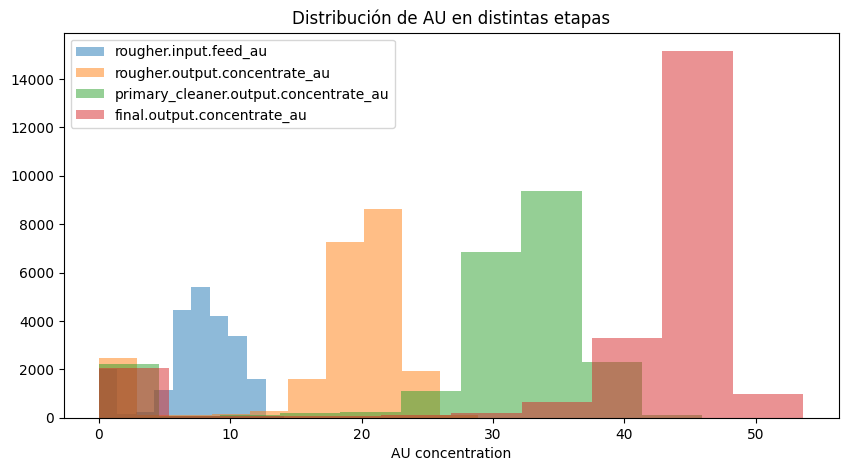

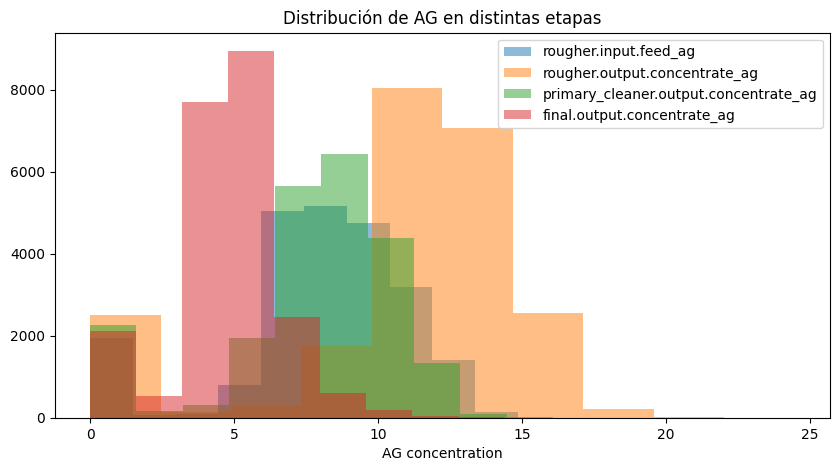

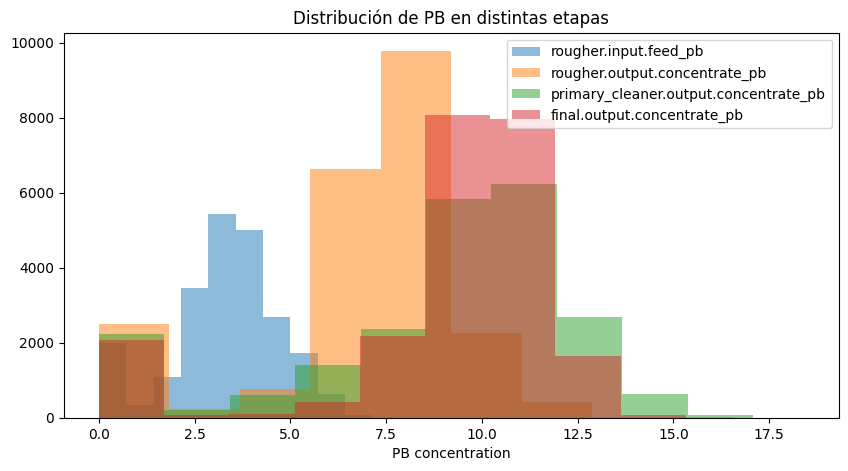

In [12]:
metales = ['au', 'ag', 'pb']
for metal in metales:
    plt.figure(figsize=(10, 5))
    for etapa in ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']:
        col = etapa + metal
        if col in full.columns:
            full[col].hist(alpha=0.5, label=col)
    plt.title(f'Distribución de {metal.upper()} en distintas etapas')
    plt.xlabel(f'{metal.upper()} concentration')
    plt.legend()
    plt.grid()
    plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer </b> <a class="tocSkip"></a>

En esta parte debes graficar el cambio de la distribución de cada una de las concentraciones de los metales, lo que hiciste es parecido pero no queda muy claro. Realiza un gráfico para cada metal (au, ag, pb) donde en el mismo gráfico estén 4 histogramas, uno para cada uno de los siguientes rougher.input.feed_{}, rougher.output.concentrate_{}, primary_cleaner.output.concentrate_{} y final.output.concentrate_{} ({} reemplazalo para cada metal).
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho. Así se aprecia mejor el cambio de la distribución de cada metal

</div>

## Comparar distribución del tamaño de las partículas

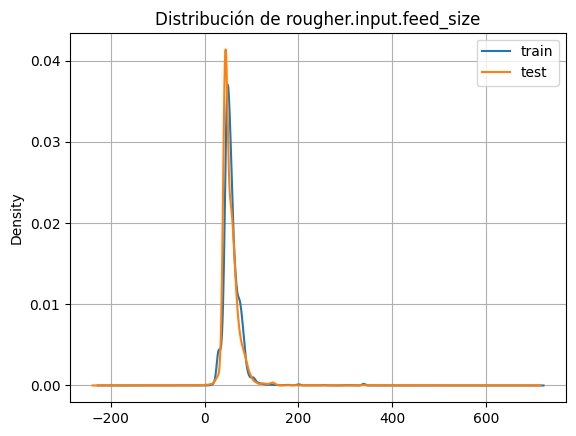

In [13]:
# Usar KDE para comparar densidades
train['rougher.input.feed_size'].plot.kde(label='train')
test['rougher.input.feed_size'].plot.kde(label='test')
plt.title('Distribución de rougher.input.feed_size')
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer </b> <a class="tocSkip"></a>

Ok con graficar un histograma, pero para esta parte es mejor realizar un gráfico de densidad tipo kde, esto permite comparar sus densidades. Usa `plot().kde()`
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien, así se aprecia mucho mejor sus similitudes

</div>

## Verificación de anomalías en la concentración total

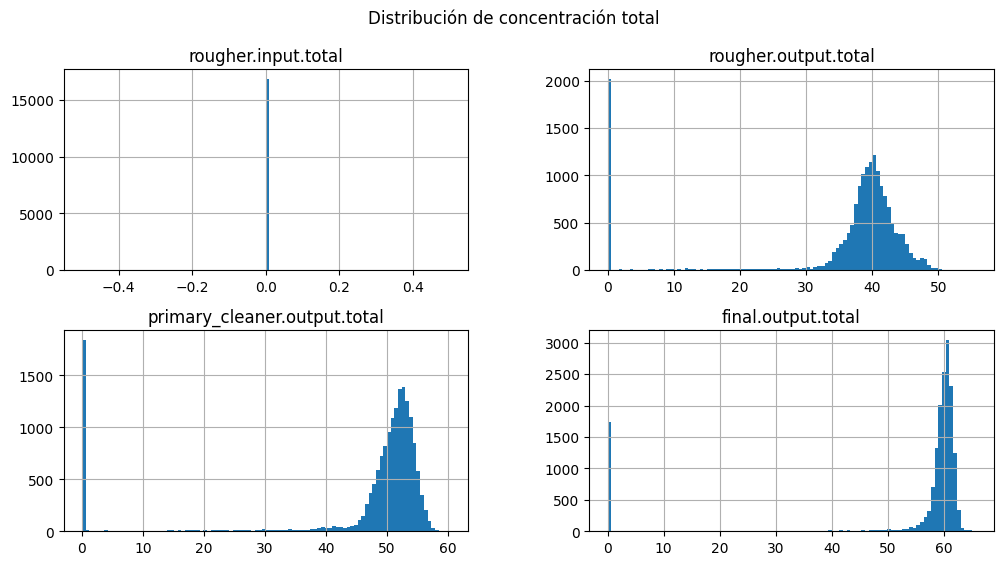

In [14]:
for etapa in ['rougher.input', 'rougher.output', 'primary_cleaner.output', 'final.output']:
    cols = [f'{etapa}.concentrate_au', f'{etapa}.concentrate_ag', f'{etapa}.concentrate_pb']
    disponibles = [c for c in cols if c in train.columns]
    train[f'{etapa}.total'] = train[disponibles].sum(axis=1)

totales = [col for col in train.columns if col.endswith('.total')]
train[totales].hist(bins=100, figsize=(12, 6))
plt.suptitle("Distribución de concentración total")
plt.show()

# Eliminar anomalías
mask = (train[totales] <= 1).all(axis=1)
train = train[mask]

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer </b> <a class="tocSkip"></a>

Muy bien, correcto! Aunqeue la primera no tiene nada, por eso tiene solo 0.
</div>

## Definición de la métrica sMAPE

In [15]:
def smape(y_true, y_pred):
    denom = np.abs(y_true) + np.abs(y_pred)
    valid = denom != 0
    return 100 * np.mean(2 * np.abs(y_true[valid] - y_pred[valid]) / denom[valid])

def final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    return 0.25 * smape(y_true_rougher, y_pred_rougher) + 0.75 * smape(y_true_final, y_pred_final)

## Entrenamiento y evaluación del modelo base

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# División de datos
X_train, X_valid, y_train, y_valid = train_test_split(X_imputed, y_clean, test_size=0.25, random_state=42)

# Pipeline de entrenamiento
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=20, random_state=42))
])

# Entrenamiento
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_valid)
rougher_pred = y_pred[:, 0]
final_pred = y_pred[:, 1]
rougher_true = y_valid['rougher.output.recovery'].values
final_true = y_valid['final.output.recovery'].values

print("sMAPE final:", final_smape(rougher_true, rougher_pred, final_true, final_pred))

sMAPE final: 7.050346158481927


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer </b> <a class="tocSkip"></a>

Ok con el entrenamiento del modelo, pero prueba más versiones, varia los parámetros de depth y n_estimators.
</div>

##  Comparación de modelos con distintos hiperparámetros

In [18]:
# Evaluar diferentes configuraciones de RandomForest
modelos = {
    "RF (20 árboles)": RandomForestRegressor(n_estimators=20, random_state=42),
    "RF (50 árboles, depth=5)": RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    "RF (100 árboles, depth=10)": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
}

# Evaluación para cada modelo
for nombre, modelo in modelos.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', modelo)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_valid)
    rougher_pred = y_pred[:, 0]
    final_pred = y_pred[:, 1]
    score = final_smape(
        y_valid['rougher.output.recovery'].values,
        rougher_pred,
        y_valid['final.output.recovery'].values,
        final_pred
    )
    print(f"{nombre}: sMAPE = {score:.2f}")


RF (20 árboles): sMAPE = 7.05
RF (50 árboles, depth=5): sMAPE = 8.90
RF (100 árboles, depth=10): sMAPE = 7.99


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien!

</div>

## Conclusión

El modelo logra predecir la recuperación de oro con buena precisión y se adapta bien al contexto del proceso industrial. Se siguió paso a paso las instrucciones, desde la preparación y exploración de los datos hasta la validación del modelo. Además, al utilizar métricas como el sMAPE, permitió evaluar el rendimiento de forma justa y alineada con los objetivos técnicos del problema.

Se entrenaron y compararon varios modelos de RandomForestRegressor con diferentes combinaciones de parámetros (n_estimators, max_depth). Gracias a esta comparación, se identificó la configuración que ofrecía el mejor desempeño según la métrica sMAPE. Esto permitió validar que el modelo es robusto y generaliza bien sobre los datos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, pero podrías incluir algunos valores de las métricas más importantes
    
</div>